<a href="https://colab.research.google.com/github/molinamarriott/challenges/blob/main/Proyecto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (9, 6)

In [ ]:
# Importamos el archivo de 

df = pd.read_csv("data.csv")
df= pd.DataFrame(df)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1.0,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1.0,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1.0,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1.0,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1.0,0.035490


In [ ]:
# Corrección de los nombres de las variables

def clean_col_names(col_name):
    col_name = (
        col_name.strip()
        .replace("?", "_")
        .replace("(", "_")
        .replace(")", "_")
        .replace(" ", "_")
        .replace("/", "_")
        .replace("-", "_")
        .replace("__", "_")
        .replace("'", "")
        .lower()
    )
    return col_name
  
df.rename(columns = {"Bankrupt?" : "Bankrupt"}, inplace = True)
bank_columns = list(df.columns)
bank_columns = [clean_col_names(col_name) for col_name in bank_columns]
df.columns = bank_columns
display(df.columns)


Index(['bankrupt', 'roa_c_before_interest_and_depreciation_before_interest',
       'roa_a_before_interest_and_%_after_tax',
       'roa_b_before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre_tax_net_interest_rate',
       'after_tax_net_interest_rate',
       'non_industry_income_and_expenditure_revenue',
       'continuous_interest_rate_after_tax_', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest_bearing_debt_interest_rate', 'tax_rate_a_',
       'net_value_per_share_b_', 'net_value_per_share_a_',
       'net_value_per_share_c_', 'persistent_eps_in_the_last_four_seasons',
       'cash_flow_per_share', 'revenue_per_share_yuan_¥_',
       'operating_profit_per_share_yuan_¥_',
       'per_share_net_profit_before_tax_yuan_¥_',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after_tax_net_profit_

In [ ]:
# Observamos algunos descriptivos de las varibles

vars_describe = df.describe().T

print(vars_describe)

print(vars_describe[vars_describe["std"] == 0])

# Eliminamos una variable sin varianza
df = df.drop(["net_income_flag"], axis=1)

# 3.22% de las empresas culminó en estado de bancarrota.

                                                     count      mean  \
bankrupt                                            3753.0  0.047162   
roa_c_before_interest_and_depreciation_before_i...  3753.0  0.499175   
roa_a_before_interest_and_%_after_tax               3752.0  0.552854   
roa_b_before_interest_and_depreciation_after_tax    3752.0  0.548079   
operating_gross_margin                              3752.0  0.607768   
...                                                    ...       ...   
liability_to_equity                                 3752.0  0.280938   
degree_of_financial_leverage_dfl_                   3752.0  0.028017   
interest_coverage_ratio_interest_expense_to_ebit_   3752.0  0.565339   
net_income_flag                                     3752.0  1.000000   
equity_to_liability                                 3752.0  0.046550   

                                                         std       min  \
bankrupt                                            0.212014 

In [ ]:
# Tamaño de la base:

df.shape

(3753, 95)

0    3576
1     177
Name: bankrupt, dtype: int64


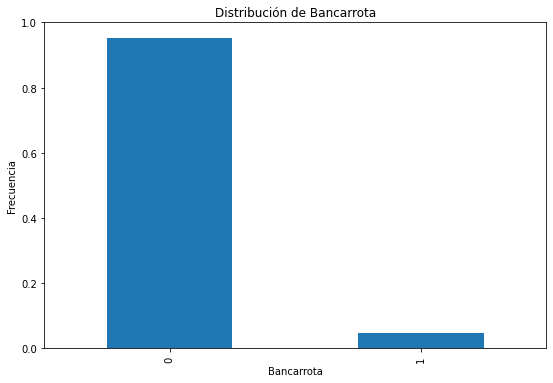

In [ ]:


# Observamos la frecuencia del target

print(df["bankrupt"].value_counts())

df["bankrupt"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Bancarrota",
    ylabel="Frecuencia",
    title="Distribución de Bancarrota"

);

In [ ]:
numeric_features = df.dtypes[df.dtypes != 'int64'].index
categorical_features = df.dtypes[df.dtypes == 'int64'].index


print(f'Variables númericas: {numeric_features}')
print(f'Variables categórica: {categorical_features}')

Variables númericas: Index(['roa_c_before_interest_and_depreciation_before_interest',
       'roa_a_before_interest_and_%_after_tax',
       'roa_b_before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre_tax_net_interest_rate',
       'after_tax_net_interest_rate',
       'non_industry_income_and_expenditure_revenue',
       'continuous_interest_rate_after_tax_', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest_bearing_debt_interest_rate', 'tax_rate_a_',
       'net_value_per_share_b_', 'net_value_per_share_a_',
       'net_value_per_share_c_', 'persistent_eps_in_the_last_four_seasons',
       'cash_flow_per_share', 'revenue_per_share_yuan_¥_',
       'operating_profit_per_share_yuan_¥_',
       'per_share_net_profit_before_tax_yuan_¥_',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after_tax_ne

Primero se segmenta la población de analisis, despues se hace el feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)


y = df["bankrupt"]
X = df.drop(columns = ["bankrupt"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score')) 

                                    Specs         Score
75                 fixed_assets_to_assets  1.597440e+11
50                     revenue_per_person  1.353600e+11
58                 cash_current_liability  7.063618e+10
48        fixed_assets_turnover_frequency  3.241324e+10
73                     cash_turnover_rate  2.362730e+10
28                total_asset_growth_rate  1.167010e+10
70            current_asset_turnover_rate  1.114050e+10
62            inventory_current_liability  6.764554e+09
11  research_and_development_expense_rate  5.363328e+09
10                 operating_expense_rate  4.200830e+09
52             allocation_rate_per_person  2.880501e+09
66  long_term_liability_to_current_assets  2.535386e+09
46                average_collection_days  1.845572e+09
33                            quick_ratio  1.289583e+09
57         quick_assets_current_liability  1.276042e+09
45           accounts_receivable_turnover  1.175341e+09
13    interest_bearing_debt_interest_rate  1.040

In [ ]:
X_train = X_train[featureScores.nlargest(20,'Score')["Specs"]]
X_test = X_test[featureScores.nlargest(20,'Score')["Specs"]]


print(X_train.shape)

(2626, 20)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [100, 200, 400, 600]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 4, 5]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [100, 200, 400, 600], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 5, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 5, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 400, 600]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [ ]:
from sklearn.metrics import confusion_matrix

rf_clf = RandomForestClassifier(
 n_estimators= 600,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= "sqrt",
 max_depth= 3,
 bootstrap= False
)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict_proba(X_test)

confusion_matrix(y_test, np.where(y_pred[:,1] < 0.3, 0, 1))

array([[1068,   11],
       [  38,    9]])

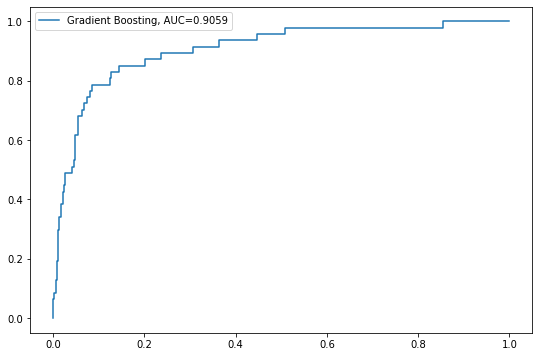

In [ ]:
# Test ROC

from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred[:,1])
auc = round(metrics.roc_auc_score(y_test, y_pred[:,1]), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

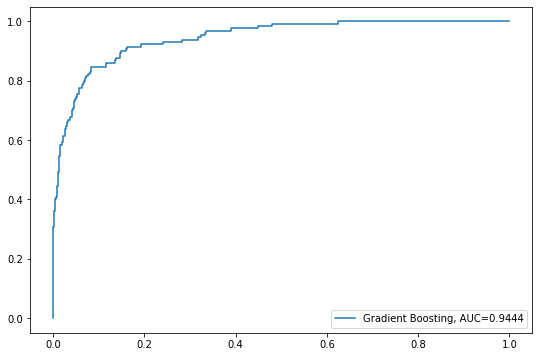

In [ ]:

# Train ROC

from sklearn import metrics

y_pred = rf_clf.predict_proba(X_train)

fpr, tpr, _ = metrics.roc_curve(y_train, y_pred[:,1])
auc = round(metrics.roc_auc_score(y_train, y_pred[:,1]), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

In [ ]:
x_total = df[featureScores.nlargest(20,'Score')["Specs"]]
x_total["pd"] = rf_clf.predict_proba(x_total)[:,1]
x_total["bankrupt"] = y

x_total

<ipython-input-51-9a00360fb514>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_total["pd"] = rf_clf.predict_proba(x_total)[:,1]
<ipython-input-51-9a00360fb514>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_total["bankrupt"] = y


,fixed_assets_to_assets,revenue_per_person,cash_current_liability,fixed_assets_turnover_frequency,cash_turnover_rate,total_asset_growth_rate,current_asset_turnover_rate,inventory_current_liability,research_and_development_expense_rate,operating_expense_rate,...,average_collection_days,quick_ratio,quick_assets_current_liability,accounts_receivable_turnover,interest_bearing_debt_interest_rate,total_debt_total_net_worth,revenue_per_share_yuan_¥_,net_value_growth_rate,pd,bankrupt
0,0.424206,0.034164,1.473360e-04,1.165007e-04,4.580000e+08,4.980000e+09,7.010000e+08,0.001036,0.000000e+00,1.256969e-04,...,0.003487,0.001208,0.001997,0.001814,0.000725,0.021266,0.017560,0.000327,0.486076,1.0
1,0.468828,0.006889,1.383910e-03,7.190000e+08,2.490000e+09,6.110000e+09,1.065198e-04,0.005210,0.000000e+00,2.897851e-04,...,0.004917,0.004039,0.004136,0.001286,0.000647,0.012502,0.021144,0.000443,0.034942,1.0
2,0.276179,0.028997,5.340000e+09,2.650000e+09,7.610000e+08,7.280000e+09,1.791094e-03,0.013879,2.550000e+07,2.361297e-04,...,0.004227,0.005348,0.006302,0.001495,0.000790,0.021248,0.005944,0.000396,0.224886,1.0
3,0.559144,0.015463,1.010646e-03,9.150000e+09,2.030000e+09,4.880000e+09,8.140000e+09,0.003540,0.000000e+00,1.078888e-04,...,0.003215,0.002896,0.002961,0.001966,0.000449,0.009572,0.014368,0.000382,0.245852,1.0
4,0.309555,0.058111,6.804636e-04,2.935211e-04,8.240000e+08,5.510000e+09,6.680000e+09,0.004869,0.000000e+00,7.890000e+09,...,0.004367,0.003727,0.004275,0.001449,0.000686,0.005150,0.029690,0.000439,0.031486,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3747,0.117987,0.243050,1.168652e-03,2.885282e-03,4.750000e+08,6.080000e+09,3.940000e+08,0.012716,1.360000e+08,9.830000e+08,...,0.002941,0.006291,0.007451,0.002151,0.000357,0.014424,0.187350,0.000394,0.101140,0.0
3748,0.410331,0.024220,1.291285e-02,5.030710e-04,3.020000e+09,6.210000e+09,4.400000e+09,0.028492,7.130000e+08,4.480000e+09,...,0.001952,0.010800,0.012405,0.003240,0.000486,0.001351,0.045359,0.000463,0.014615,0.0
3749,0.200783,0.016959,1.337891e-03,1.815595e-04,3.870000e+09,3.140000e+09,1.557132e-04,0.003177,3.380000e+09,7.320000e+09,...,0.003106,0.001296,0.004124,0.002037,0.000296,0.006436,0.006836,0.000298,0.231780,1.0
3750,0.145946,0.009650,7.721252e-03,1.853419e-04,5.830000e+09,5.460000e+09,9.370000e+09,0.008713,8.660000e+08,4.300000e+09,...,0.006702,0.009298,0.009936,0.000943,0.000321,0.002647,0.012236,0.000431,0.016752,0.0


In [ ]:
x_total["rangos"] = pd.qcut(x_total["pd"], q=4)

x_total.groupby("rangos").agg({'bankrupt': ['mean', 'count']})

<ipython-input-59-efd2a087b6cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_total["rangos"] = pd.qcut(x_total["pd"], q=4)


bankrupt      
                                    mean count
rangos                                        
(0.011699999999999999, 0.0154]  0.001066   938
(0.0154, 0.0193]                0.002132   938
(0.0193, 0.0584]                0.012793   938
(0.0584, 0.512]                 0.172708   938